In [14]:
import pandas as pd
import pywt

In [15]:
# 读取Excel文件中的数据
datatest = pd.read_excel('../Resource/ExperimentDataBase/CV1(1).xlsx')
cols = ['SAVI','EVI','TCART','CIrededge１','DVI','OSAVI','RDVI','TVI','MNVI','MSAVI','MTVI','CV']
data = datatest[cols]

In [16]:
# 对信号进行小波变换
coeffs = pywt.wavedec(data, 'db4', level=1, axis=0)

In [17]:
# 将变换后的系数重构回原信号
reconstructed = pywt.waverec(coeffs, 'db4', axis=0)

C:\Users\AnleHrc\AppData\Local\Temp\ipykernel_9016\1339677685.py:12: UserWarning: Glyph 65297 (\N{FULLWIDTH DIGIT ONE}) missing from current font.
  plt.tight_layout()
D:\PythonFile\TestAI\venv\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 65297 (\N{FULLWIDTH DIGIT ONE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


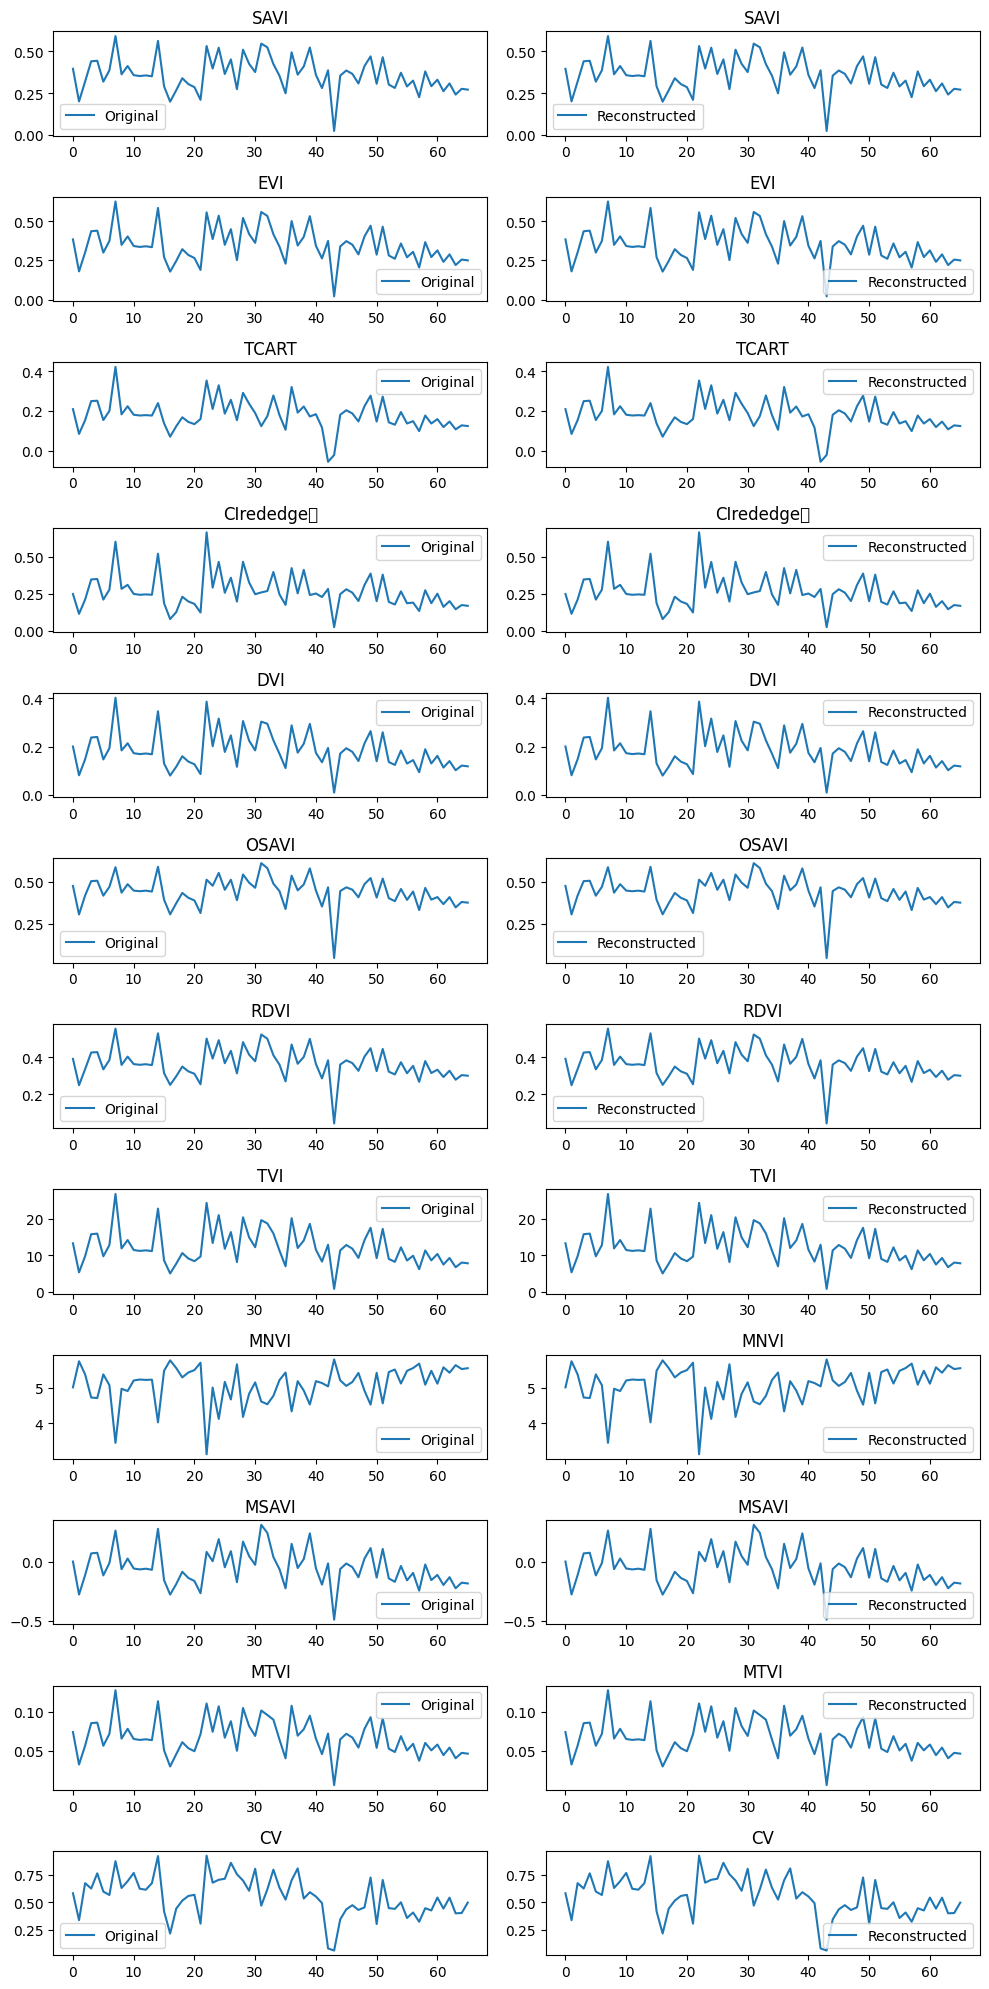

In [18]:
from sympy.physics.control.control_plots import plt

# 绘制原始数据和重构后的数据
fig, axs = plt.subplots(len(cols), 2, figsize=(10, 20))
for i, col in enumerate(cols):
    axs[i, 0].plot(datatest[col], label='Original')
    axs[i, 0].legend()
    axs[i, 0].set_title(col)
    axs[i, 1].plot(reconstructed[:, i], label='Reconstructed')
    axs[i, 1].legend()
    axs[i, 1].set_title(col)
plt.tight_layout()
plt.show()

In [8]:
# 将重构后的结果保存到Excel文件中
result = pd.DataFrame(reconstructed, columns=cols)
result.to_excel('WT_Reconstructed_data.xlsx', index=False)